1.comment
2.observations

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('C:\jupiter\student_performance\student_performance\data\student.csv')

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
data['gender'].dtypes=='O'

True

In [21]:
#filtering datatypes
cat_col=[ fea for fea in data.columns if data[fea].dtypes=='O']
num_col=cat_col=[ fea for fea in data.columns if data[fea].dtypes !='O']

In [25]:
print(cat_col)

['math score', 'reading score', 'writing score']


In [24]:
num_col=cat_col=[ fea for fea in data.columns if data[fea].dtypes !='O']
num_col

['math score', 'reading score', 'writing score']

In [26]:
cat_col=[ fea for fea in data.columns if data[fea].dtypes=='O']
cat_col

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [27]:
cat_col

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [29]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [34]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [35]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [37]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


<Axes: xlabel='math score', ylabel='Density'>

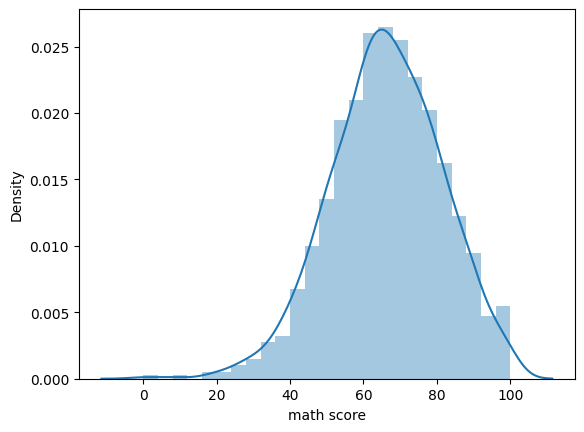

In [41]:
sns.distplot(data['math score'])

In [44]:
data[num_col].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [46]:
data[num_col].skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [50]:
type(data['gender'])

pandas.core.series.Series

<Axes: >

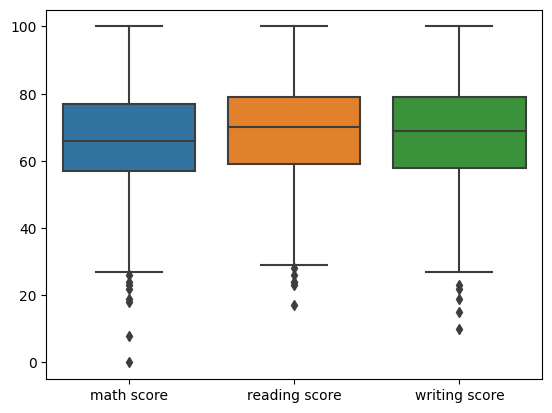

In [52]:
sns.boxplot(data=data[num_col])

In [53]:
data['math score'].quantile(0.10)

47.0

In [59]:
data['math score'].quantile(1)

100.0

In [67]:
q1=data['math score'].quantile(0.25)
q3=data['math score'].quantile(0.75)
IQR=(q3-q1)


In [70]:
q3

77.0

In [72]:
lower_limit=q1-1.5*(IQR)
uppper_limit=q3+1.5*(IQR)

In [73]:
lower_limit

27.0

In [86]:
data[data['math score']<lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [77]:
data[data['math score']>uppper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [79]:
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.25)
    q3=df[variable].quantile(0.75)
    iqr=(q3-q1)*1.5
    uppper_limit=q3+iqr
    lower_limit=q3+iqr
    return lower_limit,uppper_limit

In [84]:
data_nums=data[num_col]

In [85]:
data_nums.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
